# House Price prediction 

## Project Type : Personal project
## Dataset link: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset

Project metadata:
 - Regression type
 - Simple Sklearn algorithms are used

Project flow:
 - Data analysis
 - EDA
 - Outlier detection and removal
 - Model Selection
 - Loss function visualisation

# Required packages

In [4]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

# Load dataset

In [6]:
df=pd.read_csv("Housing.csv",sep=',')

In [7]:
df.head().T

,0,1,2,3,4
price,13300000,12250000,12250000,12215000,11410000
area,7420,8960,9960,7500,7420
bedrooms,4,4,3,4,4
bathrooms,2,4,2,2,1
stories,3,4,2,2,2
mainroad,yes,yes,yes,yes,yes
guestroom,no,no,no,no,yes
basement,no,no,yes,yes,yes
hotwaterheating,no,no,no,no,no
airconditioning,yes,yes,no,yes,yes


In [8]:
df.tail().T

,540,541,542,543,544
price,1820000,1767150,1750000,1750000,1750000
area,3000,2400,3620,2910,3850
bedrooms,2,3,2,3,3
bathrooms,1,1,1,1,1
stories,1,1,1,1,2
mainroad,yes,no,yes,no,yes
guestroom,no,no,no,no,no
basement,yes,no,no,no,no
hotwaterheating,no,no,no,no,no
airconditioning,no,no,no,no,no


In [11]:
df.shape

(545, 13)

In [15]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [19]:
cu=[col for col in df.columns if df[col].dtype != "int64"]
df[cu].describe()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


In [21]:
nu=[col for col in df.columns if df[col].dtype == "int64" and col!="price"]
df[nu].describe()

,area,bedrooms,bathrooms,stories,parking
count,545.000000,545.000000,545.000000,545.000000,545.000000
mean,5150.541284,2.965138,1.286239,1.805505,0.693578
std,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,6360.000000,3.000000,2.000000,2.000000,1.000000
max,16200.000000,6.000000,4.000000,4.000000,3.000000


# Exploratory Data analysis

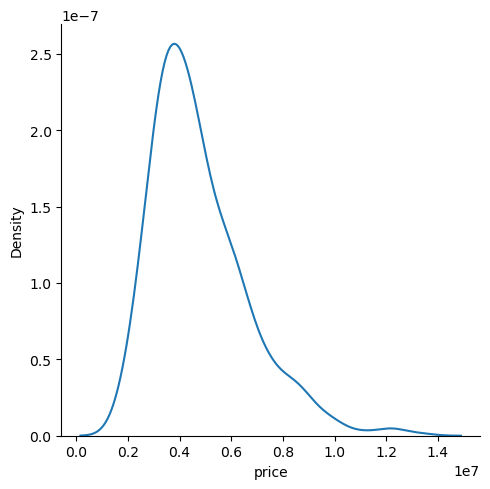

In [24]:
sns.displot(df["price"],kind="kde")
plt.show()

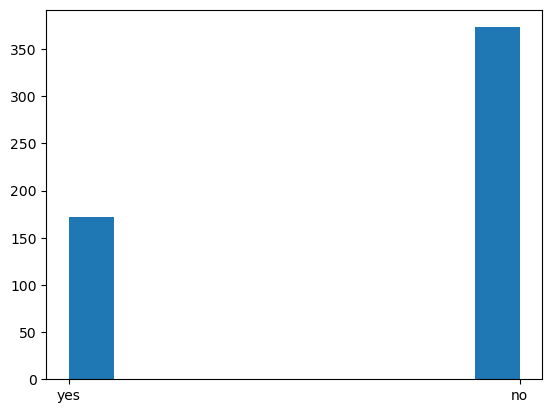

In [25]:
plt.hist(df['airconditioning'])
plt.show()

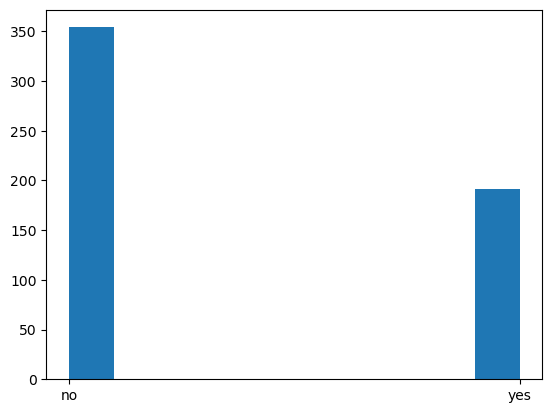

In [27]:
plt.hist(df['basement'])
plt.show()

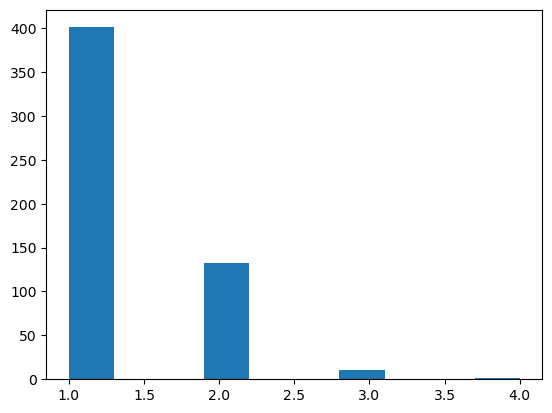

In [30]:
plt.hist(df['bathrooms'])
plt.show()

# Data Manipulation

In [33]:
df.head().T

,0,1,2,3,4
price,13300000,12250000,12250000,12215000,11410000
area,7420,8960,9960,7500,7420
bedrooms,4,4,3,4,4
bathrooms,2,4,2,2,1
stories,3,4,2,2,2
mainroad,yes,yes,yes,yes,yes
guestroom,no,no,no,no,yes
basement,no,no,yes,yes,yes
hotwaterheating,no,no,no,no,no
airconditioning,yes,yes,no,yes,yes


In [35]:
le=LabelEncoder()
X=df.drop(columns=["price"])
X["furnishingstatus"]=le.fit_transform(X['furnishingstatus'])
dicto={
    "yes":1,
    "no":0
}
for i in ["guestroom","basement","hotwaterheating","airconditioning","prefarea","mainroad"]:
    X[i]=X[i].map(dicto)
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,2
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,2
543,2910,3,1,1,0,0,0,0,0,0,0,0


In [37]:
y=df["price"]

In [39]:
X.shape

(545, 12)

In [41]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=32)
display(y_train.head().T)
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(x_train)

205    4900000
54     7350000
215    4830000
192    5040000
85     6510000
Name: price, dtype: int64

In [43]:
x_train.shape

(436, 12)

# Models selction
implementing following models for the training data
- Linear regression
- Random forest regression
- KNN regression
- Multi layer perceptron

In [46]:
lr=LinearRegression()
rfr=RandomForestRegressor()
knn=KNeighborsRegressor(n_neighbors=7)
mlp=MLPRegressor(random_state=1, max_iter=2000)
def acc(y_test,y_pred):
    print(f'r2 error: {r2_score(y_test,y_pred)}\n')
    print(f"mae: {mean_absolute_error(y_test,y_pred)}\n")
    print(f"mse: {mean_squared_error(y_test,y_pred)}\n")
y_preds={}

# linear regression

In [49]:
lr.fit(x_train,y_train)

LinearRegression()

In [51]:
y_preds["Linear regression"]=lr.predict(x_test)

# Polynomial regression

In [54]:
lr.fit(X_poly,y_train)
poly_x_test=poly.fit_transform(x_test)

In [56]:
y_preds["polynomial regression"]=lr.predict(poly_x_test)

# Random forest

In [59]:
rfr.fit(x_train,y_train)
y_preds["Random forest"]=rfr.predict(x_test)

# KNN

In [62]:
knn.fit(x_train,y_train)
y_preds["KNN"]=knn.predict(x_test)

# MLP

In [65]:
mlp.fit(x_train,y_train)
y_preds["MLP"]=mlp.predict(x_test)

In [66]:
for key,value in y_preds.items():
    print(f"{key} algorithm:")
    acc(y_test,value)

Linear regression algorithm:
r2 error: 0.6971159279858353

mae: 754587.8599727298

mse: 1029528365053.4071

polynomial regression algorithm:
r2 error: 0.6587850881668225

mae: 803638.5817441064

mse: 1159818104581.6936

Random forest algorithm:
r2 error: 0.7237327203805726

mae: 701766.680122324

mse: 939055655231.1547

KNN algorithm:
r2 error: 0.4051701151479117

mae: 1005376.1467889908

mse: 2021876669724.7708

MLP algorithm:
r2 error: 0.22208463428183534

mae: 1266852.1241556087

mse: 2644199575408.1484



In [71]:
tt=df

for i in ["guestroom","basement","hotwaterheating","airconditioning","prefarea","mainroad"]:
    tt[i]=tt[i].map(dicto)
'''
tt["furnishingstatus"]=tt["furnishingstatus"].map({"furnished":2,"semi-furnished":1,"unfurnished":0})
'''
tt

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


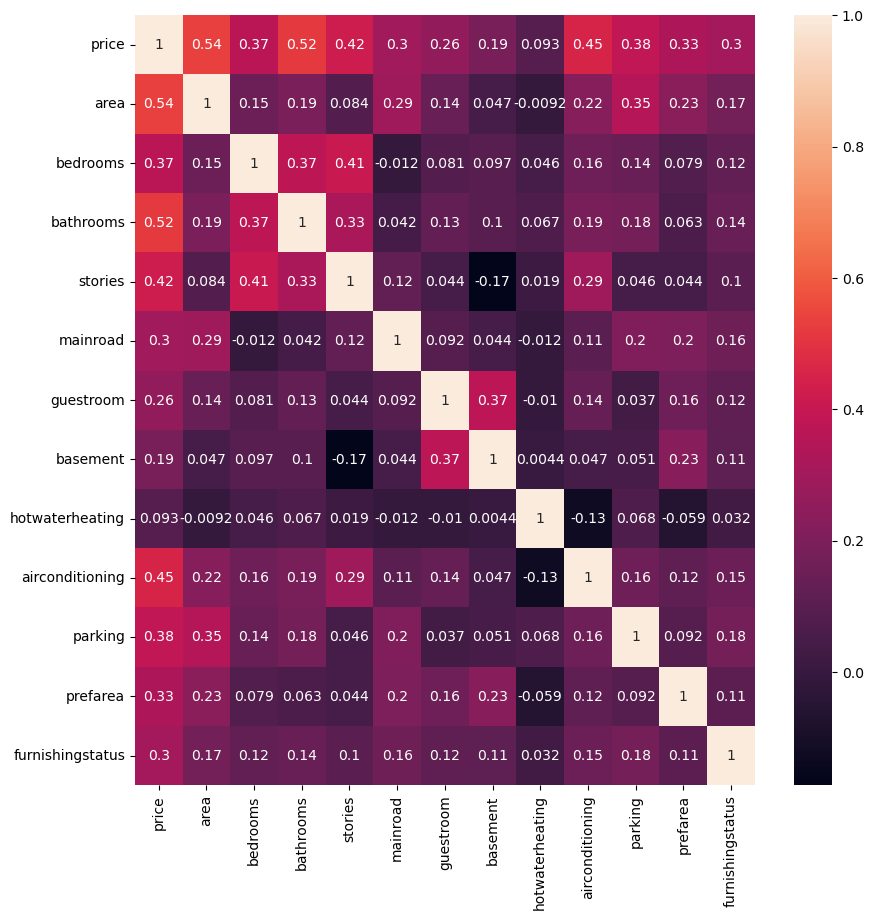

In [73]:
plt.figure(figsize=(10,10))
sns.heatmap(tt.corr(),annot=True)
plt.show()

In [75]:
tt.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,0.104672
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.156726
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.118328
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.112831
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,0.031628
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,0.150477


# feature extraction with Random forest as selected model

In [98]:
actual_X=tt[["area","bathrooms","stories","airconditioning","parking","furnishingstatus","prefarea","mainroad"]]
actual_y=tt["price"]
display(actual_X.head().T)
display(actual_y.head().T)

,0,1,2,3,4
area,7420,8960,9960,7500,7420
bathrooms,2,4,2,2,1
stories,3,4,2,2,2
airconditioning,1,1,0,1,1
parking,2,3,2,3,2
furnishingstatus,2,2,1,2,2
prefarea,1,0,1,1,0
mainroad,1,1,1,1,1


0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

In [100]:
x_train,x_test,y_train,y_test=train_test_split(actual_X,actual_y,test_size=0.20,random_state=32)


In [102]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [104]:
pred=rfr.predict(x_test)

In [106]:
acc(y_test,pred)

r2 error: 0.6503963506140648

mae: 781693.5681957187

mse: 1188332127125.4373

